### Assignment 3


Data Visualization and Pre-processing


Description:-
    Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-onsuming task. Other measurements, which are easier to obtain, are used to predict age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.


Building a Regression Model


1. Perform Below Visualizations.


Univariate Analysis


1. Summary Statistics


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
from google.colab import files


uploaded = files.upload()


Saving abalone.csv to abalone.csv


In [3]:
file_data = pd.read_csv('abalone.csv')
file_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Add a Age column in a dataset


In [4]:
file_data['Age']=''
file_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,


In [5]:
file_data['Age']=file_data['Rings']+1.5
file_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


Drop the Rings Column


In [6]:
file_data = file_data.drop(columns=['Rings'],axis=1)
file_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [7]:
file_data['Height'].mean()

0.13951639932966242

In [8]:
file_data['Height'].median()

0.14

In [9]:
file_data['Height'].std()

0.041827056607257274

2. Frequency Table


In [10]:
file_data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

3. Create Charts

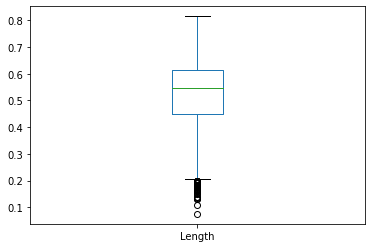

In [11]:
file_data.boxplot(column=['Length'], grid=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04b695c910>]],
      dtype=object)

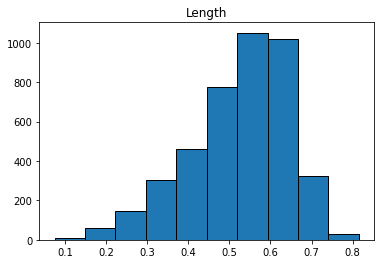

In [12]:
file_data.hist(column='Length', grid=False, edgecolor='black')

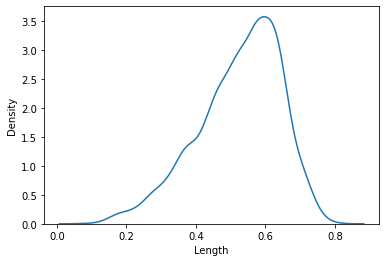

In [13]:
sns.kdeplot(file_data['Length'])

Bi - Variate Analysis


1. Barplot


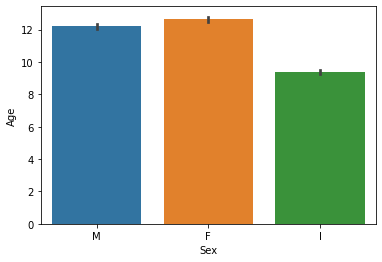

In [14]:
data = sns.barplot(x = file_data["Sex"], y = file_data["Age"])
data

2. Correlation Coefficients

In [15]:
file_data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


3.Linear Plot

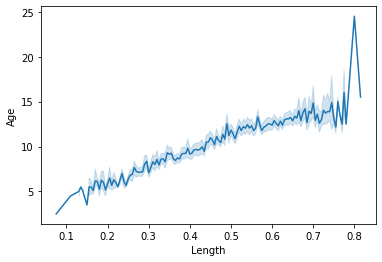

In [16]:
data = sns.lineplot(x = file_data["Length"], y = file_data["Age"])
data

4. Scatter Plot

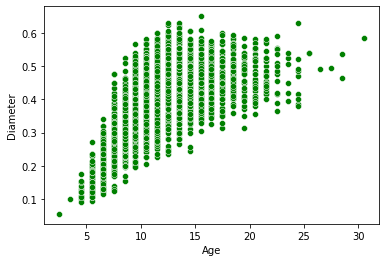

In [17]:
data = sns.scatterplot(x = file_data['Age'],y = file_data['Diameter'], color="green")
data

Multi - Variate Analysis

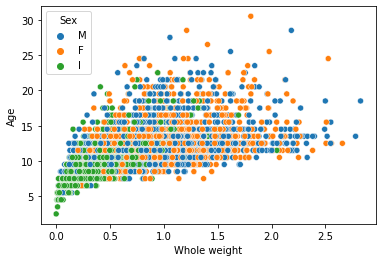

In [18]:
x = sns.scatterplot(x=file_data['Whole weight'],y=file_data['Age'],hue=file_data["Sex"])
x

4. Perform descriptive statistics on the dataset.

In [19]:
file_data.shape

(4177, 9)

In [20]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [21]:
file_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [22]:
file_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [23]:
file_data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,13.5


In [24]:
file_data.mean(numeric_only=True)

Length             0.523992
Diameter           0.407881
Height             0.139516
Whole weight       0.828742
Shucked weight     0.359367
Viscera weight     0.180594
Shell weight       0.238831
Age               11.433684
dtype: float64

In [25]:
file_data.median(numeric_only=True)

Length             0.5450
Diameter           0.4250
Height             0.1400
Whole weight       0.7995
Shucked weight     0.3360
Viscera weight     0.1710
Shell weight       0.2340
Age               10.5000
dtype: float64

In [26]:
file_data.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,10.5
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
file_data.var(numeric_only=True)

Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
Age               10.395266
dtype: float64

In [28]:
file_data.std(numeric_only=True)

Length            0.120093
Diameter          0.099240
Height            0.041827
Whole weight      0.490389
Shucked weight    0.221963
Viscera weight    0.109614
Shell weight      0.139203
Age               3.224169
dtype: float64

In [29]:
file_data.skew(numeric_only=True)

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

In [30]:
file_data.kurt(numeric_only=True)

Length             0.064621
Diameter          -0.045476
Height            76.025509
Whole weight      -0.023644
Shucked weight     0.595124
Viscera weight     0.084012
Shell weight       0.531926
Age                2.330687
dtype: float64

In [31]:
quantile = file_data['Whole weight'].quantile(q=[0.75, 0.25])
quantile

0.75    1.1530
0.25    0.4415
Name: Whole weight, dtype: float64

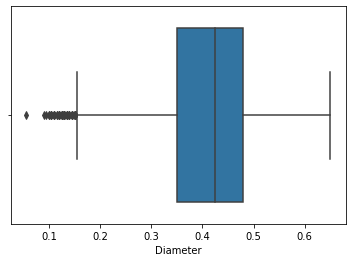

In [32]:
x = file_data.Diameter
sns.boxplot(x=x)

5. Handle the Missing values.

In [33]:
print(file_data.isnull())

        Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0     False   False     False   False         False           False   
1     False   False     False   False         False           False   
2     False   False     False   False         False           False   
3     False   False     False   False         False           False   
4     False   False     False   False         False           False   
...     ...     ...       ...     ...           ...             ...   
4172  False   False     False   False         False           False   
4173  False   False     False   False         False           False   
4174  False   False     False   False         False           False   
4175  False   False     False   False         False           False   
4176  False   False     False   False         False           False   

      Viscera weight  Shell weight    Age  
0              False         False  False  
1              False         False  False  
2              

In [34]:
print(file_data.isnull().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64


In [35]:
file_data.isna().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Age               False
dtype: bool

6. Find the outliers and replace the outliers

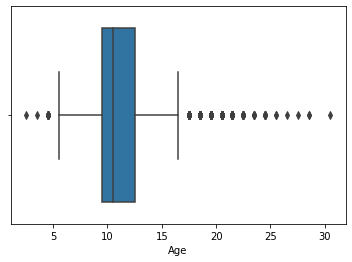

In [36]:
x = sns.boxplot(x=file_data["Age"])
x

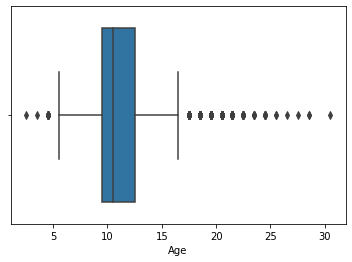

In [37]:
x = file_data.Age
sns.boxplot(x=x)

In [38]:
x = np.where(file_data['Age']>57,39, file_data['Age'])

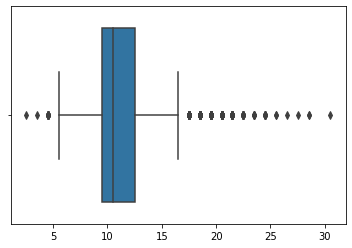

In [39]:
sns.boxplot(x=x)

7. Check for Categorical columns and perform encoding.

In [40]:
import warnings
warnings.filterwarnings('ignore')
x = pd.Categorical(file_data["Whole weight"])
x

[0.5140, 0.2255, 0.6770, 0.5160, 0.2050, ..., 0.8870, 0.9660, 1.1760, 1.0945, 1.9485]
Length: 4177
Categories (2429, float64): [0.0020, 0.0080, 0.0105, 0.0130, ..., 2.5550, 2.6570, 2.7795, 2.8255]

In [41]:
# One Hot Encoding

pd.get_dummies(file_data["Height"]).head(10)

,0.000,0.010,0.015,0.020,0.025,0.030,0.035,0.040,0.045,0.050,...,0.210,0.215,0.220,0.225,0.230,0.235,0.240,0.250,0.515,1.130
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
pd.get_dummies(file_data).head(10)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0,1,0
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,9.5,0,1,0
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,21.5,1,0,0
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,17.5,1,0,0
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,10.5,0,0,1
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,20.5,1,0,0


8. Split the data into dependent and independent variables.

In [43]:
# Splitting the Dataset into the Independent

X = file_data.iloc[:, :-1].values
print(X)

[['M' 0.455 0.365 ... 0.2245 0.101 0.15]
 ['M' 0.35 0.265 ... 0.0995 0.0485 0.07]
 ['F' 0.53 0.42 ... 0.2565 0.1415 0.21]
 ...
 ['M' 0.6 0.475 ... 0.5255 0.2875 0.308]
 ['F' 0.625 0.485 ... 0.531 0.261 0.296]
 ['M' 0.71 0.555 ... 0.9455 0.3765 0.495]]


In [44]:
# Extracting the Dataset to Get the Dependent

Y = file_data.iloc[:, -1].values
print(Y)

[16.5  8.5 10.5 ... 10.5 11.5 13.5]


9. Scale the independent variables

In [45]:
from sklearn.preprocessing import scale

In [46]:
x = scale(file_data["Viscera weight"])
x

array([-0.72621157, -1.20522124, -0.35668983, ...,  0.97541324,
        0.73362741,  1.78744868])

10. Split the data into training and testing

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x = file_data.iloc[:, 1:7]
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010
1,0.350,0.265,0.090,0.2255,0.0995,0.0485
2,0.530,0.420,0.135,0.6770,0.2565,0.1415
3,0.440,0.365,0.125,0.5160,0.2155,0.1140
4,0.330,0.255,0.080,0.2050,0.0895,0.0395
...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610


In [49]:
y = file_data.iloc[:, -1]
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state =42)

In [51]:
x_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
3823,0.615,0.455,0.135,1.0590,0.4735,0.2630
3956,0.515,0.395,0.140,0.6860,0.2810,0.1255
3623,0.660,0.530,0.175,1.5830,0.7395,0.3505
0,0.455,0.365,0.095,0.5140,0.2245,0.1010
2183,0.495,0.400,0.155,0.8085,0.2345,0.1155
...,...,...,...,...,...,...
3444,0.490,0.400,0.115,0.5690,0.2560,0.1325
466,0.670,0.550,0.190,1.3905,0.5425,0.3035
3092,0.510,0.395,0.125,0.5805,0.2440,0.1335
3772,0.575,0.465,0.120,1.0535,0.5160,0.2185


In [52]:
y_train

3823    10.5
3956    13.5
3623    11.5
0       16.5
2183     7.5
        ... 
3444    10.5
466     13.5
3092    12.5
3772    10.5
860      7.5
Name: Age, Length: 3132, dtype: float64

In [53]:
print(x_train.shape, x_test.shape)

(3132, 6) (1045, 6)


11. Build the Model

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model=LinearRegression()

In [56]:
model.fit(x_train,y_train)

LinearRegression()

12.Train the Model

In [57]:
Y_predict_train = model.predict(x_train)
Y_predict_train

array([11.25888828, 11.95379472, 12.33692259, ..., 11.12903068,
       10.71152746, 11.59516371])

13.Test the Model

In [58]:
y_predict = model.predict(x_test)
y_predict

array([13.0478407 , 11.43166184, 15.59825921, ..., 13.69440346,
       11.79279231, 10.83037939])

14. Measure the performance using Metrics

In [59]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_predict))
print(math.sqrt(mean_squared_error(y_test, y_predict)))

4.862459933051861
2.2050986220692854
